# Introduction to neural network classification with TensorFlow

In this notebook  I will write neural networks for calssification problems. I will use the sklearn toy dataset (make_circles)

There are perhaps *four* main types of classification :

* Binary Classification.
* Multi-Class Classification.
* Multi-Label Classification.
* Imbalanced Classification.

At the end of this notebook I will do  a minin project on multiclass classification


# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand. Visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


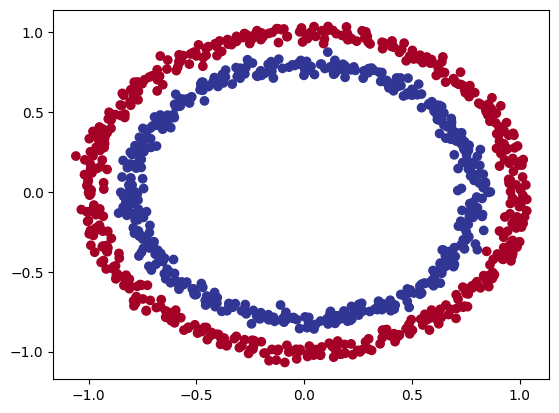

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input and Output Shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples are working
len(X), len(y)

(1000, 1000)

In [9]:
# Viewing the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling

In [10]:
#  Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [11]:
# Set the random tensors
tf.random.set_seed(42)

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 6.1245 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.9772 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4007 - accuracy: 0.4610
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.7036 - accuracy: 0.5840
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.5528 - accuracy: 0.5750


In [12]:
# Try improving the model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 7ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since the problme at hand is a binary classification problem and the model is getting around 50% accaracy. It's performing as if its guesing

To take things up a notch, I can try to add and extra layer

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the modlel
model_2.fit(X,y, epochs= 200, verbose=0)

In [14]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

The loss function remains relatively the same and the accuracy is  at 50%. If I was to guess "red blue red blue", I would get the same output as the model. At this rate, the model is not even learning, it is guessing. This is preposterous!!!

In [15]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving our model

1. Create a model = try adding the number of hidden layers
`Add 100 denses neurons, 10 and 1 repectively
2. Compiling a model = Use a different optimizer. Perhaps Adam
3. Fit a model = training for longer (600 epochs)


In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(X,y,epochs=500, verbose=0)

In [17]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5190


[0.6931685209274292, 0.5189999938011169]

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


The above model is still guessing

To visualize the model's prediction , I will need a to create a function.
This function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the diffferent X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(Where each unique class falls)

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

**The above function was inspired by:**

https://cs231n.github.io/neural-networks-case-study/

https://madewithml.com


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


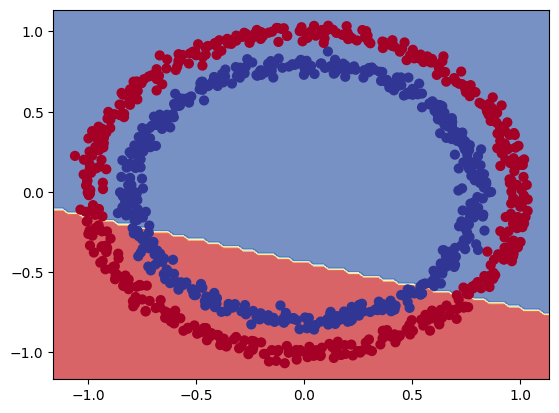

In [20]:
# Check the predictions the model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

**The neural network plots a staight line. How well can it adapt with a regression problem?**

Because the nueral network performs so poorly and predicts that the decision boundary is a straight line whereas the data is circular.

In [21]:
# Let's see if  our model can be used for a regressoin problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regresion data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)


ValueError: ignored

Oh wait...  The compiled model is for a binary classification problem

But now, the problem at hand is a regression problmem, Change the model to suit the data.

In [23]:
# Recreating model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)



Epoch 1/100
5/5 [==============================] - 2s 4ms/step - loss: 217.9381 - mae: 217.9381
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 118.0619 - mae: 118.0619
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 48.8001 - mae: 48.8001
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 70.1812 - mae: 70.1812
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 63.5747 - mae: 63.5747
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 44.4480 - mae: 44.4480
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.7735 - mae: 45.7735
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 41.6845 - mae: 41.6845
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4614 - mae: 42.4614
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.8859 - mae: 41.8859
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


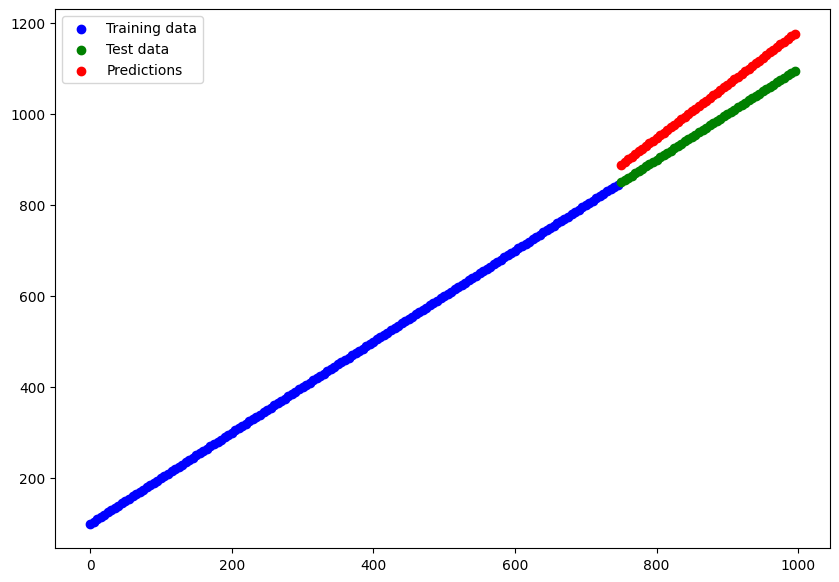

In [24]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Ploet the model's performances against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

 Using the same model but for a regression model. The prediction looks much better than guessing. This means the model is learning but it is missing something in the classification problem

 **Whats the difference?**
 The regression problem is a straight line wheres the classification problem is non-linear. Here's the problem, the decision boundary that our model is trying to plot is linear.




# **The missing piece:** *Non-linearity*


In [25]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation =tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.4703 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4306 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3911 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3161 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3023 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2020 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1575 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0861 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8612 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7550 - accuracy: 0.4780
Epoch 11/

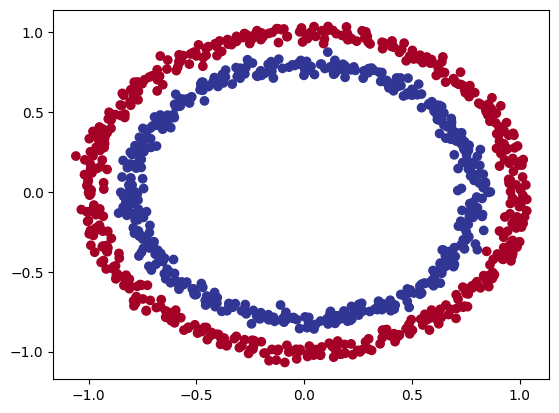

In [26]:
# Check out the data
plt.scatter(X[:,0], X[:,1], c=y , cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


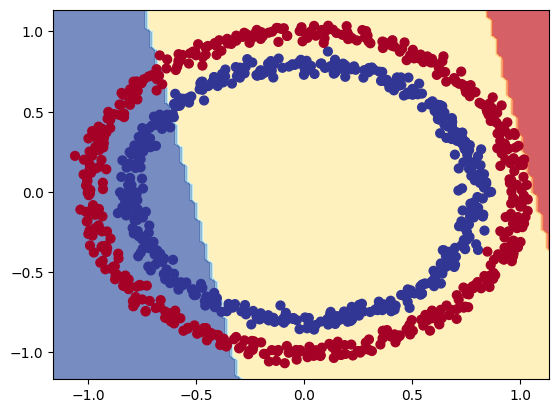

In [27]:
# Check the decision boundary for model_4
plot_decision_boundary(model=model_4, X=X, y=y)

Clearly, the model isn't performin well. It's all over the place. Basically, what the model is saying is that it anything in the yellow section can be red or blue.
This is the reason why its accuracy is below guessing.

*Tidbit:*
* See how  to impove a classification model by experimenting on the TensoFlow Playground

https://playground.tensorflow.org/

# Building nueral network with a non linear activation function

In [28]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6263 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5752 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4821 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4356 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3242 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2959 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2695 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1857 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9543 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 4.6972 - accuracy: 0.4780
Epoch 11/

Still not learning

### Improving the model
* Adding then number of hidden layers
* Adding the number of dense nuerons
* Changing the activation function

In [29]:
# Sete the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8323 - accuracy: 0.4420
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5000 - accuracy: 0.4520
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2959 - accuracy: 0.4510
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1176 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9627 - accuracy: 0.4640
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6825 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4672 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9563 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9148 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.4770
Epoch 11/

In [30]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.5570


[0.6660513281822205, 0.5569999814033508]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


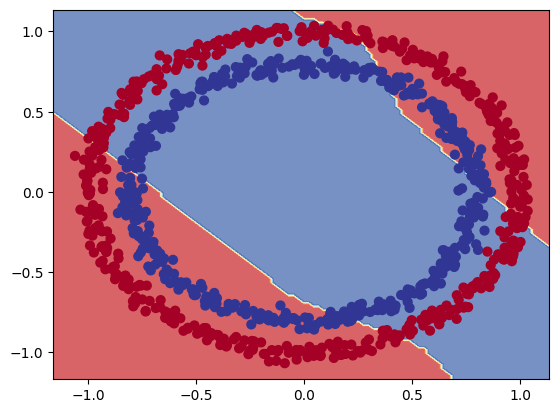

In [31]:
# How does the model prediction look
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y);

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5130
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5130
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5210
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5230
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5200
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5240
Epoch 11/

In [33]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8690


[0.4282653331756592, 0.8690000176429749]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


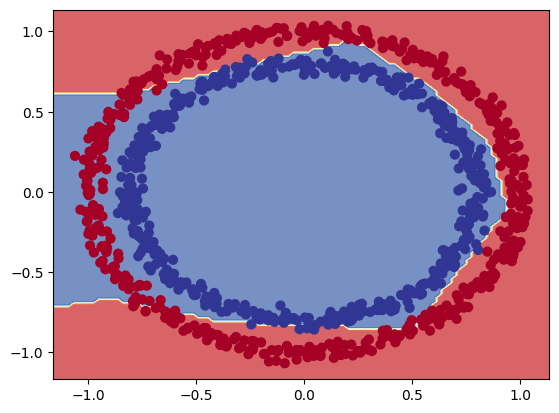

In [34]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y);

## Get some intuition about the activation functions created and then try them on some toy data.

In [35]:
# Create a toy tensor(similar to data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

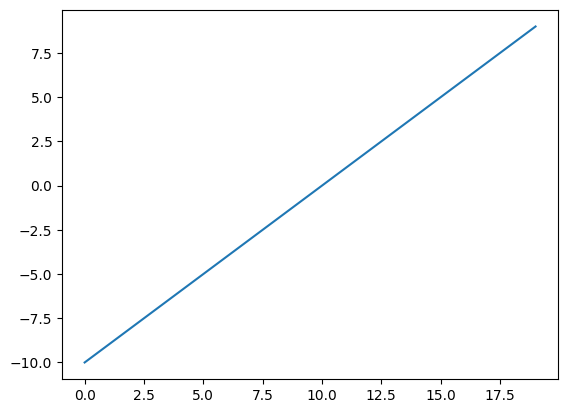

In [36]:
# Visualize the toy tensor
plt.plot(A);

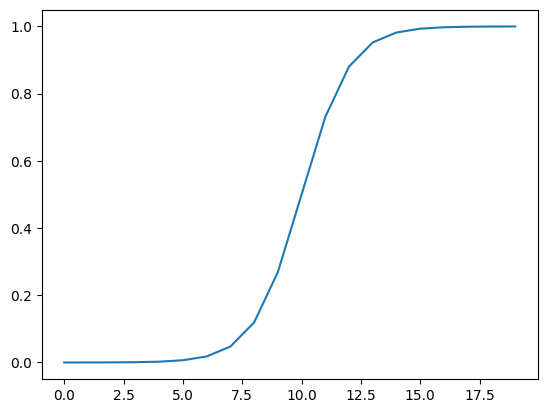

In [37]:
# Plot the toy tensor trasformed by Sigmoid
plt.plot(tf.keras.activations.sigmoid(A));

In [38]:
# Recreating the relu function
def relu(x):
  return tf.maximum(0, x)

#Pass the toy tensor to the custom function
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

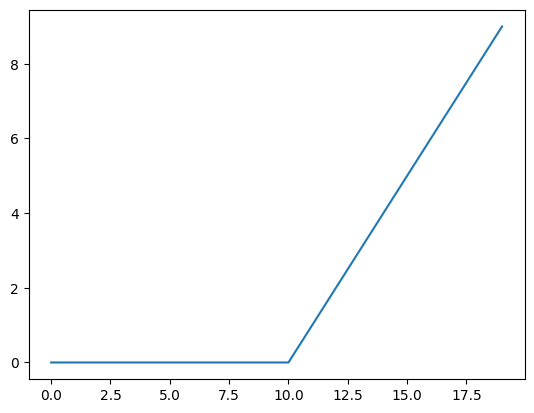

In [39]:
# Plot the ReLU
plt.plot(relu(A));

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

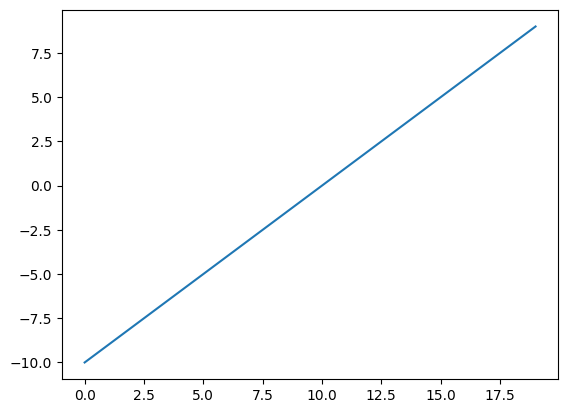

In [41]:
# plot the activation
plt.plot(tf.keras.activations.linear(A));

# Evaluating and Improving the model

In [42]:
# Create training and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
# Recreating the model

# Set random seed
tf.random.set_seed(42)

# Create the model(same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(lr=0.01),
                  metrics=['accuracy'])

# Fit the model
history= model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7285 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.5013
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4963
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.4613
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.4225
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.2950
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.2900
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.3288
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.3913
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.3338
Epoch 11/25
25/25 [

The model still performs poorly. This is to show that tuning hyperparameters doesn't always work.

 Try leaving  Adam to default and train for 100 epochs instead

In [70]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6880 - accuracy: 0.5213
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5213
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5250
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5250
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5275
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5263
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5263
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5288
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5387
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5350
Epoch 11/

In [71]:
model_8.evaluate(X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.9388


[0.39109158515930176, 0.9387500286102295]

Using the 100 epochs and leaving the Adam optimizer to default, the new model_8 actually performs better than the previous one.

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


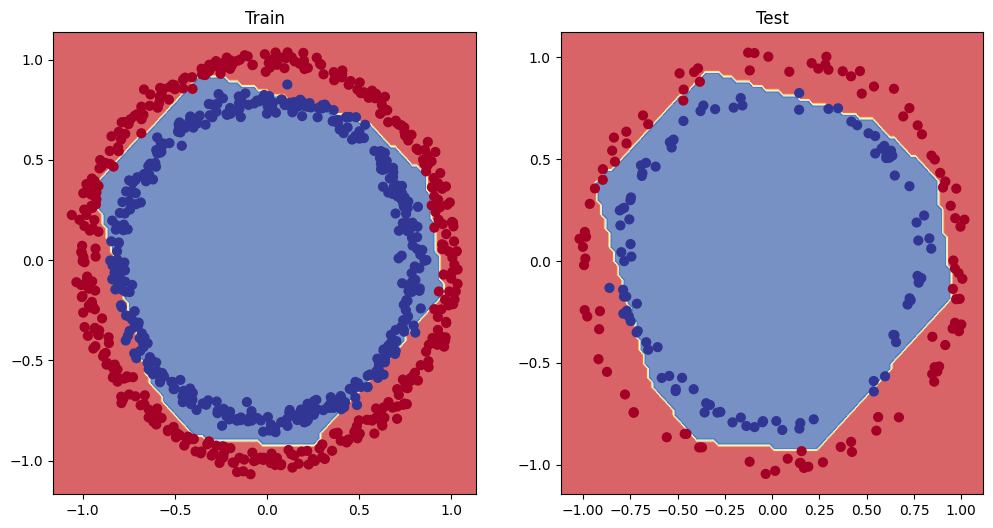

In [89]:
# Plot the decision boundary
plt.figure(figsize=(12,6));
plt.subplot(1,2,1);
plt.title("Train");
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

# Plot the loss curves or training curves

In [90]:
history.history

{'loss': [0.688040018081665,
  0.6865999698638916,
  0.685620129108429,
  0.6848980784416199,
  0.6841483116149902,
  0.68352210521698,
  0.6827360391616821,
  0.6821863651275635,
  0.681644082069397,
  0.6808256506919861,
  0.6802850365638733,
  0.679522693157196,
  0.6782957315444946,
  0.6771268248558044,
  0.6764089465141296,
  0.6753799915313721,
  0.6746989488601685,
  0.6736708283424377,
  0.6730137467384338,
  0.6719785332679749,
  0.670931339263916,
  0.6698771119117737,
  0.6689167022705078,
  0.6678907871246338,
  0.6667084693908691,
  0.6655826568603516,
  0.6644502878189087,
  0.6628556847572327,
  0.6612347960472107,
  0.658977746963501,
  0.6565001010894775,
  0.6545791625976562,
  0.6524770259857178,
  0.6504886150360107,
  0.648604154586792,
  0.6460449695587158,
  0.6436718702316284,
  0.6415922045707703,
  0.6386445164680481,
  0.6360793709754944,
  0.6332904696464539,
  0.6299474239349365,
  0.6269877552986145,
  0.6236679553985596,
  0.6202009320259094,
  0.6168183

In [91]:
# Convert the history object into a  DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.688040,0.52125
1,0.686600,0.52125
2,0.685620,0.52500
3,0.684898,0.52500
4,0.684148,0.52750
...,...,...
95,0.409043,0.92500
96,0.406065,0.93250
97,0.401381,0.93375
98,0.397740,0.94000


Text(0.5, 1.0, 'model_8 loss curves')

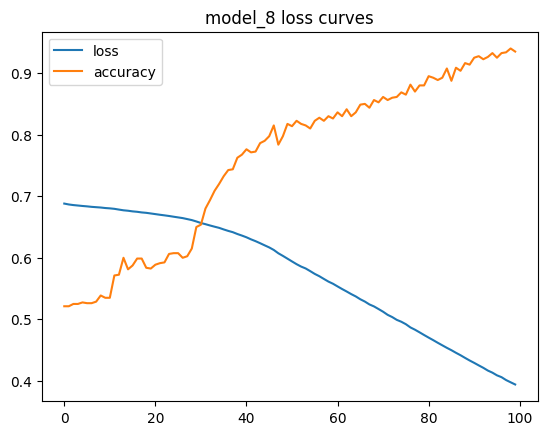

In [92]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

**Note** For many problems, the loss function going down means the model is improving(the predictions it's making are  getting closer to the ground truth labels)

## Finding the best leearning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - An extra piece of functionality added to the model while training
* Another model
* A modified loss curve plot

In [93]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the modle
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=lr_schedular)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7152 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

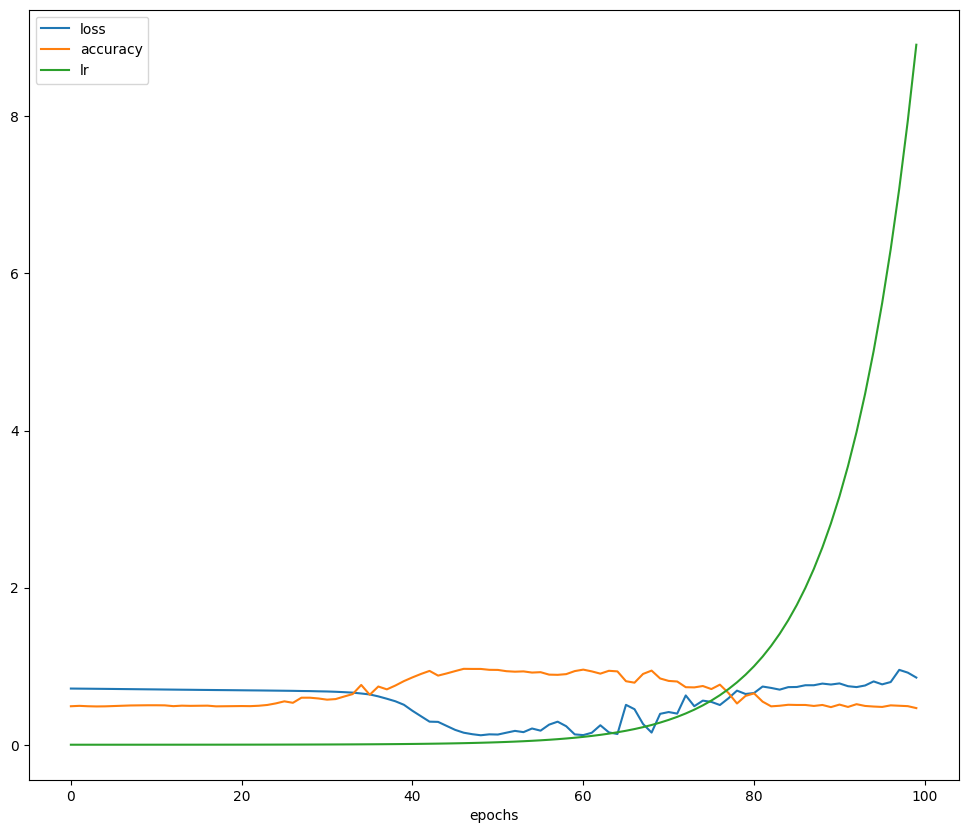

In [94]:
# Checkout the  history
pd.DataFrame(history_9.history).plot(figsize=(12,10), xlabel='epochs');

The learning rate exponentially increases as the number of epochs increases.

The model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, plot the loss versus the log-scale learning rate.

In [95]:
# Plot the learning rate versus the loss
lrs = 1e-4 *(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

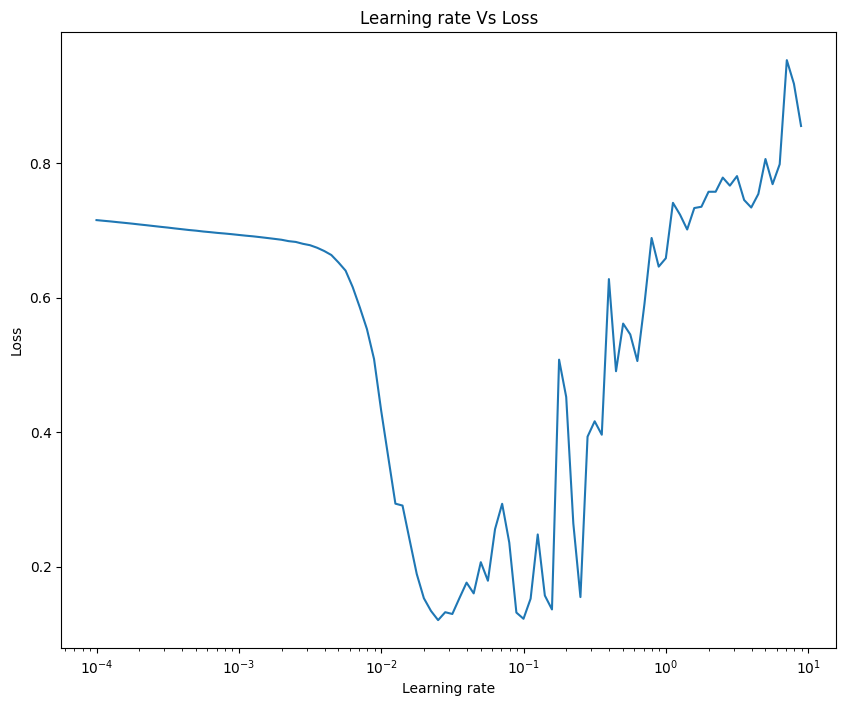

In [96]:
plt.figure(figsize=(10,8))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("Loss")
plt.title("Learning rate Vs Loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training the model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (
10
−
2
) and 0.02.



In [97]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [101]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.4888
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4800
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4925
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4963
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4988
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4988
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5150
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5213
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5250
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5250
Epoch 11/20
25/25 [

In [102]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5100


[0.6873421669006348, 0.5099999904632568]

The model is performing poorly. I'll training for longer

In [103]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10_review = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10_review.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10_review.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 2s 3ms/step - loss: 0.7097 - accuracy: 0.5013
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.4900
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.4487
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.4087
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4275
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4737
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4425
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.4575
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4787
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4775
Epoch 11/

From, what I can tell, the model has improved its accuracy after just training at the 43rd epoch.

In [104]:
model_10_review.evaluate(X_test, y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.1389 - accuracy: 0.9900


[0.13885480165481567, 0.9900000095367432]

The Loss remains to be relatively higher but it gets an accuracy of 99%

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


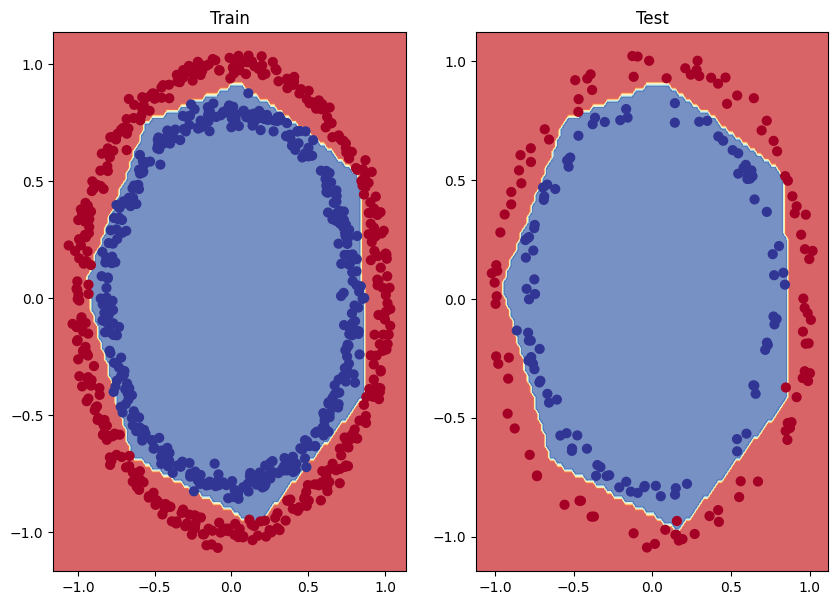

In [106]:
# Plot the decision boundary for training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10_review, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10_review, X_test, y_test)
plt.show()

# More classfication evaluation methods

Alongside visualizing the model's results a much as possible, there are a handful of other classification evaluation methods & metrics to be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion-matrix
* Classification report(from scikit-Learn)

In [109]:
# Check the accuracy of the model
loss, accuracy = model_10_review.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9900
Model loss on the test set: 0.13885480165481567
Model accuracy on the test set: 99.00%


## A Confusion matrix
A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier

In [116]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model_10_review.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 8ms/step


ValueError: ignored

In [117]:
y_preds = model_10_review(X_test)

In [118]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [119]:
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[8.94325793e-01],
       [8.94325793e-01],
       [8.69917989e-01],
       [8.74346673e-01],
       [1.99974179e-02],
       [1.32577777e-01],
       [7.68485129e-01],
       [3.18141617e-02],
       [8.94325793e-01],
       [1.74404815e-01],
       [8.94325793e-01],
       [4.28929508e-01],
       [8.73878062e-01],
       [8.94325793e-01],
       [8.85176003e-01],
       [8.52602959e-01],
       [7.34060645e-01],
       [8.94325793e-01],
       [1.54218229e-03],
       [8.94325793e-01],
       [8.04733038e-02],
       [8.94325793e-01],
       [8.77412319e-01],
       [8.94325793e-01],
       [1.43493608e-01],
       [8.94325793e-01],
       [8.94325793e-01],
       [2.86993962e-02],
       [2.90214956e-01],
       [8.85617912e-01],
       [1.79970726e-01],
       [8.23444784e-01],
       [8.22792530e-01],
       [1.23110572e-02],
       [2.77267937e-02],
       [8.57805967e-01],
       [8.17115247e-01],
       [6.42499387e-01],


Our predictions resulst in probabilities form(the std output from the sigmoid(or softmax activation functions))

In [120]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [121]:
# Create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

## Using sklearn's plot_confusion_matrix


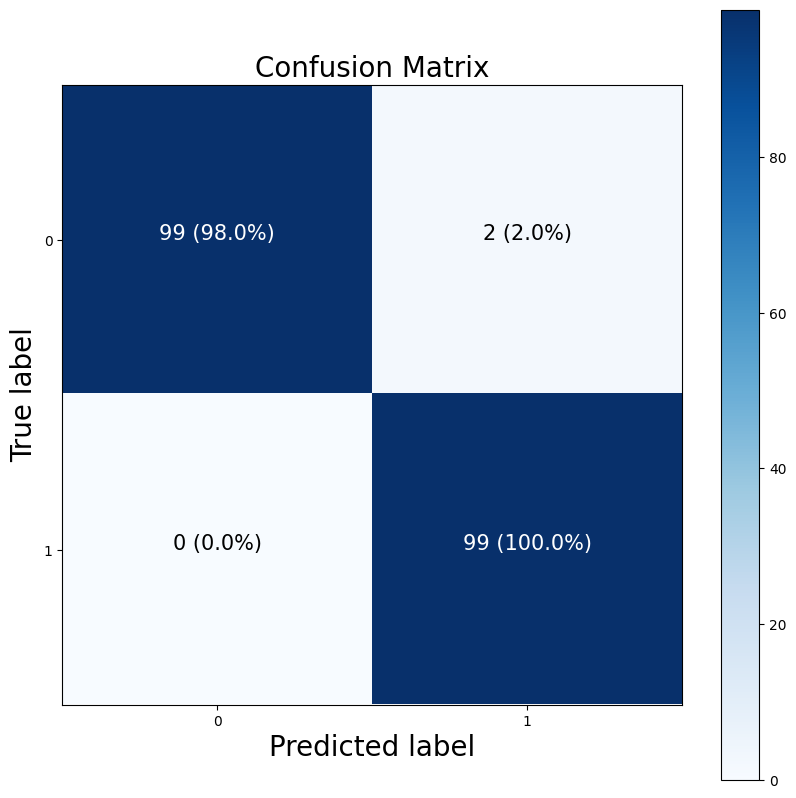

In [129]:

# The following confusion matrix code is a remix of Scikit-Learn's
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

It seems that the model(model_10_review) has made almost perfect predictions on the test set except for 2 false positives(top right corner)